## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

## Loading the dataset

In [2]:
bank=pd.read_csv(r"C:\Users\HP\Downloads\credit_risk_dataset.csv")

In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
bank.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [5]:
bank.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [6]:
bank=bank.fillna(bank['person_emp_length'].mean())

In [7]:
bank.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

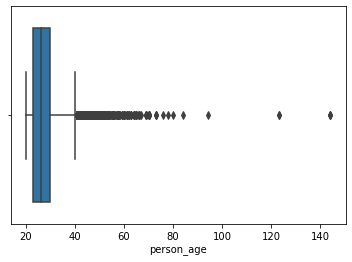

In [9]:
sns.boxplot(bank['person_age'])

In [10]:
q1=bank['person_age'].quantile(0.25)
q3=bank['person_age'].quantile(0.75)

In [11]:
iqr=q3-q1
iqr

7.0

In [12]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [13]:
bank[bank['person_age']>upper_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.570000,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.860000,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.250000,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,4.789686,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.690000,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.160000,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.490000,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.990000,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.480000,0,0.10,N,26


In [14]:
bank[bank['person_age']>lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [15]:
new_df=bank[bank['person_age']<upper_limit]
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32292,38,200000,MORTGAGE,0.0,DEBTCONSOLIDATION,A,3000,7.68,0,0.01,N,12
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13
32294,36,92000,MORTGAGE,18.0,DEBTCONSOLIDATION,A,4000,7.29,0,0.04,N,13


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_age'>

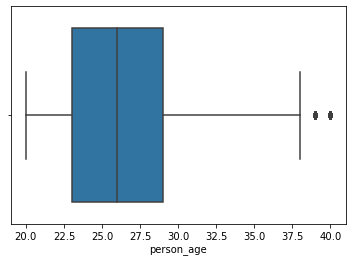

In [16]:
sns.boxplot(new_df['person_age'])

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

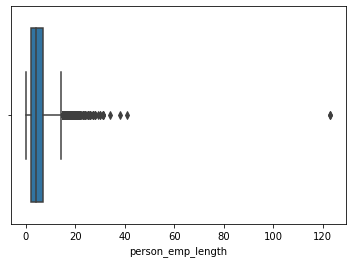

In [17]:
sns.boxplot(bank['person_emp_length'])

In [18]:
q1=bank['person_emp_length'].quantile(0.25)
q3=bank['person_emp_length'].quantile(0.75)

In [19]:
iqr=q3-q1
iqr

5.0

In [20]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [21]:
bank[bank['person_emp_length']>upper_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4
17834,34,948000,MORTGAGE,18.0,PERSONAL,B,2000,9.99,0,0.00,N,7
17847,35,500000,MORTGAGE,17.0,DEBTCONSOLIDATION,C,20000,13.85,0,0.04,Y,7
17850,34,120000,RENT,17.0,VENTURE,B,35000,10.59,0,0.29,N,6
...,...,...,...,...,...,...,...,...,...,...,...,...
32516,52,29000,OWN,23.0,PERSONAL,A,7000,7.49,0,0.24,N,20
32519,51,115900,MORTGAGE,16.0,PERSONAL,A,12000,7.88,0,0.10,N,29
32534,76,75000,RENT,23.0,MEDICAL,A,15000,8.94,0,0.20,N,25
32539,61,148000,MORTGAGE,30.0,DEBTCONSOLIDATION,B,24000,10.38,1,0.16,N,20


In [22]:
bank[bank['person_emp_length']>lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [23]:
new_df=bank[bank['person_emp_length']<upper_limit]
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_emp_length'>

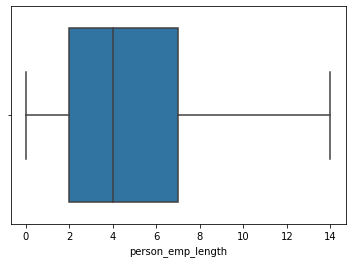

In [24]:
sns.boxplot(new_df['person_emp_length'])

C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

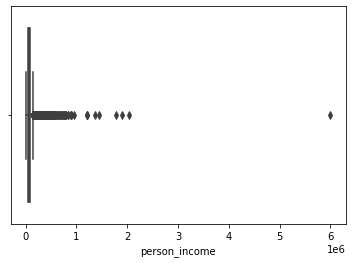

In [25]:
sns.boxplot(bank['person_income'])

In [26]:
q1=bank['person_income'].quantile(0.25)
q3=bank['person_income'].quantile(0.75)

In [27]:
iqr=q3-q1
iqr

40700.0

In [28]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr

In [29]:
bank[bank['person_income']>upper_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15,23,500000,MORTGAGE,7.0,DEBTCONSOLIDATION,B,30000,10.650000,0,0.06,N,3
20,25,162500,RENT,2.0,VENTURE,A,35000,7.490000,0,0.22,N,4
33,25,306000,RENT,2.0,DEBTCONSOLIDATION,C,24250,13.850000,0,0.08,N,3
34,26,300000,MORTGAGE,10.0,MEDICAL,C,7800,13.490000,0,0.03,N,4
42,26,300000,MORTGAGE,10.0,VENTURE,A,20000,7.880000,0,0.07,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32544,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,20
32546,60,1900000,MORTGAGE,5.0,PERSONAL,A,1500,4.789686,0,0.00,N,21
32551,58,780000,MORTGAGE,7.0,PERSONAL,A,4500,6.910000,0,0.01,N,19
32562,61,160000,MORTGAGE,30.0,PERSONAL,B,24000,10.380000,0,0.15,N,21


In [30]:
bank[bank['person_income']>lower_limit]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [31]:
new_df=bank[bank['person_income']<upper_limit]
new_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


C:\Users\HP\OneDrive\Documents\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='person_income'>

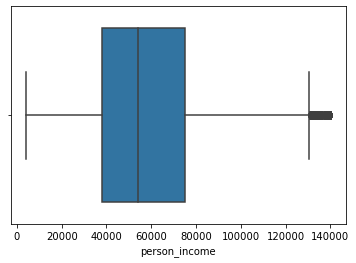

In [32]:
sns.boxplot(new_df['person_income'])

## Identifying the target variables

## The output variable for the dataset is loan status and this is available in our historical data

## so it will come under supervised learning

## the output is of discrete so apply classification task

## the evaluation metrics will be of accuracy score

In [33]:
X=bank[['person_age','person_income','person_home_ownership','person_emp_length','loan_intent','loan_grade','loan_amnt','loan_int_rate','loan_percent_income','cb_person_default_on_file','cb_person_cred_hist_length']]
y=bank['loan_status']

In [34]:
X.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4


In [35]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

## splitting the dataset into training and testing using 75:25 split

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(24435, 11) (24435,)
(8146, 11) (8146,)


In [37]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
12231,22,80000,MORTGAGE,4.0,PERSONAL,A,7250,4.789686,0.09,N,3
23891,30,67000,MORTGAGE,6.0,HOMEIMPROVEMENT,A,10000,6.990000,0.15,N,6
1191,25,59160,RENT,0.0,HOMEIMPROVEMENT,E,16600,14.180000,0.28,N,4
8463,24,58000,MORTGAGE,5.0,DEBTCONSOLIDATION,A,7000,6.990000,0.12,N,4
17638,24,46000,RENT,0.0,PERSONAL,D,5975,14.460000,0.13,Y,4


## separating categorical and numerical columns of train data

In [38]:
X_train_cat=X_train.select_dtypes(include=['object'])
X_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
12231,MORTGAGE,PERSONAL,A,N
23891,MORTGAGE,HOMEIMPROVEMENT,A,N
1191,RENT,HOMEIMPROVEMENT,E,N
8463,MORTGAGE,DEBTCONSOLIDATION,A,N
17638,RENT,PERSONAL,D,Y
...,...,...,...,...
13123,OWN,MEDICAL,B,N
19648,MORTGAGE,DEBTCONSOLIDATION,C,Y
9845,RENT,MEDICAL,B,N
10799,RENT,VENTURE,C,N


In [39]:
X_train_num=X_train.select_dtypes(include=['int64','float64'])
X_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,22,80000,4.0,7250,4.789686,0.09,3
23891,30,67000,6.0,10000,6.990000,0.15,6
1191,25,59160,0.0,16600,14.180000,0.28,4
8463,24,58000,5.0,7000,6.990000,0.12,4
17638,24,46000,0.0,5975,14.460000,0.13,4
...,...,...,...,...,...,...,...
13123,24,88494,8.0,24000,4.789686,0.27,2
19648,32,35000,11.0,4000,13.610000,0.11,5
9845,22,38500,1.0,9000,10.830000,0.23,2
10799,23,42000,4.0,10000,4.789686,0.24,2


In [40]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,22,80000,4.0,7250,4.789686,0.09,3
23891,30,67000,6.0,10000,6.990000,0.15,6
1191,25,59160,0.0,16600,14.180000,0.28,4
8463,24,58000,5.0,7000,6.990000,0.12,4
17638,24,46000,0.0,5975,14.460000,0.13,4


## scaling the numerical features of train data

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_num_transformed=pd.DataFrame(scaler.fit_transform(X_train_num),columns=X_train_num.columns,index=X_train_num.index)
X_train_num_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
12231,-0.905024,0.204465,-0.196943,-0.372728,-1.566315,-0.751368,-0.690988
23891,0.360863,0.008150,0.286354,0.062224,-0.952802,-0.190787,0.050929
1191,-0.430316,-0.110243,-1.163535,1.106109,1.051985,1.023804,-0.443682
8463,-0.588552,-0.127760,0.044706,-0.412269,-0.952802,-0.471077,-0.443682
17638,-0.588552,-0.308974,-1.163535,-0.574387,1.130058,-0.377647,-0.443682
...,...,...,...,...,...,...,...
13123,-0.588552,0.332734,0.769650,2.276525,-1.566315,0.930374,-0.938293
19648,0.677335,-0.475087,1.494595,-0.886762,0.893052,-0.564508,-0.196377
9845,-0.905024,-0.422233,-0.921887,-0.095940,0.117905,0.556654,-0.938293
10799,-0.746788,-0.369379,-0.196943,0.062224,-1.566315,0.650084,-0.938293


In [42]:
X_train_num_transformed.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04,2.443500e+04
mean,-6.152003e-18,-9.504709e-17,-1.667765e-16,2.561441e-18,-2.187278e-16,3.149153e-16,-2.478158e-16
std,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00,1.000020e+00
min,-1.221495e+00,-9.432227e-01,-1.163535e+00,-1.440337e+00,-1.566315e+00,-1.592239e+00,-9.382934e-01
25%,-7.467877e-01,-4.222329e-01,-6.802390e-01,-7.285976e-01,-8.133867e-01,-7.513678e-01,-6.909879e-01
50%,-2.720802e-01,-1.730638e-01,-1.969426e-01,-2.541046e-01,5.935081e-02,-1.907871e-01,-4.436824e-01
75%,3.608632e-01,1.981225e-01,5.280020e-01,4.299562e-01,7.536372e-01,5.566538e-01,5.455397e-01
max,1.839975e+01,8.960330e+01,2.855919e+01,4.016333e+00,3.263106e+00,5.695310e+00,5.986261e+00


In [43]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 7
Mean of each column: [2.77194598e+01 6.64603057e+04 4.81499713e+00 9.60658584e+03
 1.04071433e+01 1.70420299e-01 5.79406589e+00]
Std of each column: [6.31968060e+00 6.62201026e+04 4.13824741e+00 6.32253749e+03
 3.58641630e+00 1.07031869e-01 4.04358159e+00]


## applying one hot encoding on categorical columns as the columns are of nominal data

In [44]:
X_train_cat['person_home_ownership'].value_counts(normalize=True)

RENT        0.505545
MORTGAGE    0.412769
OWN         0.078289
OTHER       0.003397
Name: person_home_ownership, dtype: float64

In [45]:
X_train_cat['loan_intent'].value_counts(normalize=True)

EDUCATION            0.196849
MEDICAL              0.187600
VENTURE              0.173931
PERSONAL             0.169797
DEBTCONSOLIDATION    0.160467
HOMEIMPROVEMENT      0.111357
Name: loan_intent, dtype: float64

In [46]:
X_train_cat['loan_grade'].value_counts(normalize=True)

A    0.331042
B    0.319746
C    0.198895
D    0.110538
E    0.030203
F    0.007612
G    0.001964
Name: loan_grade, dtype: float64

In [47]:
X_train_cat['cb_person_default_on_file'].value_counts(normalize=True)

N    0.820667
Y    0.179333
Name: cb_person_default_on_file, dtype: float64

In [48]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder.fit_transform(X_train_cat), 
                               columns=encoder.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
12231,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8463,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## concating the rescaled and encoded dataframes

In [49]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_ohe], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
12231,-0.905024,0.204465,-0.196943,-0.372728,-1.566315,-0.751368,-0.690988,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.360863,0.008150,0.286354,0.062224,-0.952802,-0.190787,0.050929,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,-0.430316,-0.110243,-1.163535,1.106109,1.051985,1.023804,-0.443682,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8463,-0.588552,-0.127760,0.044706,-0.412269,-0.952802,-0.471077,-0.443682,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,-0.588552,-0.308974,-1.163535,-0.574387,1.130058,-0.377647,-0.443682,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## preparing the test data

In [50]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2124,24,41300,RENT,2.0,EDUCATION,C,2400,12.68,0.06,N,2
252,24,85000,RENT,5.0,MEDICAL,B,25000,10.62,0.29,N,4
13083,24,88000,MORTGAGE,4.0,MEDICAL,B,6000,9.91,0.07,N,2
12447,23,81120,MORTGAGE,3.0,PERSONAL,B,15000,10.25,0.18,N,4
31009,39,73000,MORTGAGE,3.0,VENTURE,A,10000,7.51,0.14,N,14


In [51]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8146 entries, 2124 to 709
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  8146 non-null   int64  
 1   person_income               8146 non-null   int64  
 2   person_home_ownership       8146 non-null   object 
 3   person_emp_length           8146 non-null   float64
 4   loan_intent                 8146 non-null   object 
 5   loan_grade                  8146 non-null   object 
 6   loan_amnt                   8146 non-null   int64  
 7   loan_int_rate               8146 non-null   float64
 8   loan_percent_income         8146 non-null   float64
 9   cb_person_default_on_file   8146 non-null   object 
 10  cb_person_cred_hist_length  8146 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 763.7+ KB


## separating the categorical and numerical columns of test data 

In [52]:
X_test_cat=X_test.select_dtypes(include=['object'])
X_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
2124,RENT,EDUCATION,C,N
252,RENT,MEDICAL,B,N
13083,MORTGAGE,MEDICAL,B,N
12447,MORTGAGE,PERSONAL,B,N
31009,MORTGAGE,VENTURE,A,N
...,...,...,...,...
1438,MORTGAGE,EDUCATION,A,N
28083,MORTGAGE,VENTURE,A,N
22127,MORTGAGE,PERSONAL,D,Y
10487,MORTGAGE,EDUCATION,A,N


In [53]:
X_test_num=X_test.select_dtypes(include=['int64','float64'])
X_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,24,41300,2.000000,2400,12.680000,0.06,2
252,24,85000,5.000000,25000,10.620000,0.29,4
13083,24,88000,4.000000,6000,9.910000,0.07,2
12447,23,81120,3.000000,15000,10.250000,0.18,4
31009,39,73000,3.000000,10000,7.510000,0.14,14
...,...,...,...,...,...,...,...
1438,21,26784,4.789686,2000,6.990000,0.07,3
28083,27,50000,0.000000,12000,6.620000,0.24,8
22127,30,52000,9.000000,9000,12.490000,0.17,6
10487,24,68000,7.000000,6000,7.880000,0.09,2


In [54]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_test_cat_ohe = pd.DataFrame(encoder.fit_transform(X_test_cat), 
                               columns=encoder.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
2124,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
252,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
2124,-0.588552,-0.379950,-0.680239,-1.139825,0.633740,-1.031658,-0.938293
252,-0.588552,0.279971,0.044706,2.434689,0.059351,1.117235,-0.443682
13083,-0.588552,0.325274,-0.196943,-0.570433,-0.138618,-0.938228,-0.938293
12447,-0.746788,0.221378,-0.438591,0.853046,-0.043816,0.089503,-0.443682
31009,1.784986,0.098757,-0.438591,0.062224,-0.807810,-0.284217,2.029373


In [56]:
X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_ohe], axis=1)

X_test_transformed.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
2124,-0.588552,-0.379950,-0.680239,-1.139825,0.633740,-1.031658,-0.938293,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
252,-0.588552,0.279971,0.044706,2.434689,0.059351,1.117235,-0.443682,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13083,-0.588552,0.325274,-0.196943,-0.570433,-0.138618,-0.938228,-0.938293,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,-0.746788,0.221378,-0.438591,0.853046,-0.043816,0.089503,-0.443682,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
31009,1.784986,0.098757,-0.438591,0.062224,-0.807810,-0.284217,2.029373,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)

LogisticRegression()

In [58]:
y_test_pred = classifier.predict(X_test_transformed)

In [59]:
from sklearn import metrics

lg=metrics.accuracy_score(y_test, y_test_pred)
lg



0.8708568622636877

## KNN CLASSIFIER

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

knn=metrics.accuracy_score(y_test, y_test_pred)
knn

0.8908666830346182

## DECISION TREE CLASSIFIER

In [61]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

dt=metrics.accuracy_score(y_test, y_test_pred)
dt

0.8875521728455684

## RANDOM FOREST CLASSIFIER

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

rt=metrics.accuracy_score(y_test, y_test_pred)
rt

0.9322366805794254

## GRADIENT BOOSTING CLASSIFIER

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train_transformed, y_train)
y_test_pred = classifier.predict(X_test_transformed)


In [64]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

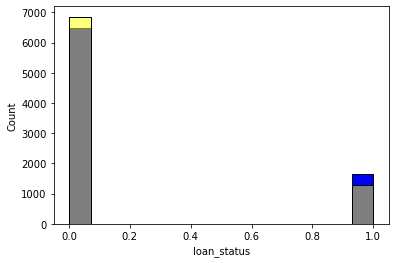

In [65]:
sns.histplot(y_test, color='blue', alpha=1.0)
sns.histplot(y_test_pred, color='yellow', alpha=0.5)

In [66]:
gbdt=metrics.accuracy_score(y_test, y_test_pred)
gbdt

0.9231524674686963

## SUPPORT VECTOR CLASSIFIER

In [67]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train_transformed, y_train)

SVC()

In [68]:
y_test_pred = classifier.predict(X_test_transformed)

In [69]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

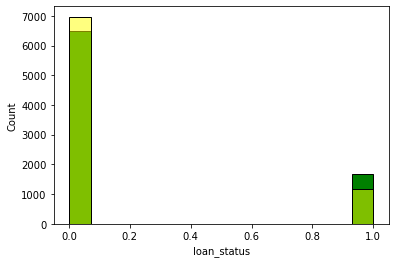

In [70]:
sns.histplot(y_test, color='green', alpha=1.0)
sns.histplot(y_test_pred, color='yellow', alpha=0.5)

In [71]:
sv=metrics.accuracy_score(y_test, y_test_pred)
sv


0.914804812177756

## NAIVE BASED CLASSIFIER

In [72]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train_transformed,y_train)


GaussianNB()

In [73]:
y_test_pred = classifier.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
2124,0,0
252,0,0
13083,0,0
12447,0,0
31009,0,0


In [75]:
nb=metrics.accuracy_score(y_test, y_test_pred)
nb

0.8377117603731893

In [76]:
rows=[['Logistic Regression',lg],['SVC',sv],['DT classifier',dt],['KNN classifier',knn],['GaussianNB',nb],['Random forest Classifier',rt],['Gradient Boosting classifier',gbdt]]

df=pd.DataFrame(data=rows,columns=['TYPE OF CLASSIFIER','Accuracy_Score'])

df

,TYPE OF CLASSIFIER,Accuracy_Score
0,Logistic Regression,0.870857
1,SVC,0.914805
2,DT classifier,0.887552
3,KNN classifier,0.890867
4,GaussianNB,0.837712
5,Random forest Classifier,0.932237
6,Gradient Boosting classifier,0.923152


## OBSERVATIONS

## Random Forest Classifier is the best algorithm to predict the credit risk scoring as it gives highest accuracy compared to others.